In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.gridspec as gridspec

In [2]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/'

In [3]:
tia1_aggr_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RBFOX2-TIA1-STAMP_possorted_genome_bam_MD-33_barcodes.tsv.fx.annotated'
tia1_bulk_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/Tia1_1000ng_1_S14_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'

rbfox2_aggr_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RBFOX2-TIA1-STAMP_possorted_genome_bam_MD-34_barcodes.tsv.fx.annotated'
rbfox2_bulk_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'

undetermined_aggr_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-27_barcodes.tsv.fx.annotated'
rps2_bulk_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'
rps2_aggr_file_3k = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RPS2-STAMP_possorted_genome_bam-RPS2_STAMP_Apo_filtered_lenti_common_expression_barcodes.txt.fx.annotated'
rps2_aggr_file_10k = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RPS2-STAMP_possorted_genome_bam_MD.fx.annotated'

apo_aggr_file_all = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/APOBEC-STAMP_possorted_genome_bam_MD.fx.annotated'

In [4]:
COLORS = sns.color_palette("hls", 8)

In [5]:
annotated_headers = [
    'chrom','start','end','conf','frac','strand','geneid','genename','region','annotation'
]

In [6]:
def consolidate_noncoding(row):
    """
    This changes some of the annotations to better fit the background.
    I'm replacing all "noncoding intron" and "noncoding exon" annotations with just "noncoding"
    Also replacing any 'codon' regions and labeling them 'CDS' instead.
    """
    if 'noncoding' in row['region']:
        return 'noncoding'
    elif 'codon' in row['region']:
        return 'CDS'
    else:
        return row['region']

In [7]:
def plot_pie(fn, conf, colors=COLORS):
    df = pd.read_csv(fn, names=annotated_headers, sep='\t')
    df = df[df['conf'] >= conf]
    df['consolidated_region'] = df.apply(consolidate_noncoding, axis=1)
    
    fig, ax = plt.subplots()
    df_value_counts = df['consolidated_region'].value_counts()
    df_value_counts = df_value_counts.reindex(['3utr','5utr','CDS','noncoding','intergenic','distintron500','proxintron500'])
    df_value_counts.plot(kind='pie', ax=ax, colors=colors)
    ax.axis('equal')
    utr3 = df[df['consolidated_region']=='3utr'].shape[0]
    ax.set_title("{} 3'UTR edits ({}%) found in\n{}".format(utr3, utr3/float(df.shape[0]), os.path.basename(fn)))

### Look at the scRPS2 (all) vs the scApo (all) at conf=0.9

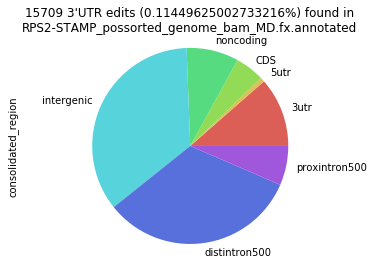

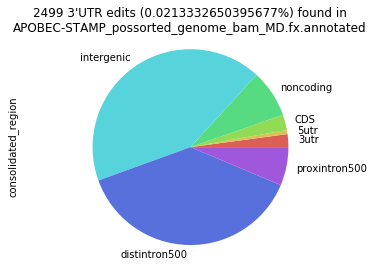

In [8]:
for f in [rps2_aggr_file_10k, apo_aggr_file_all]:
    plot_pie(f, conf=0.9)

### Looking at the edit distribution between sc aggregates and the bulk data (TIA1, RBFOX2) at conf=0.9
- after calling edits with SAILOR and annotating with annotator.

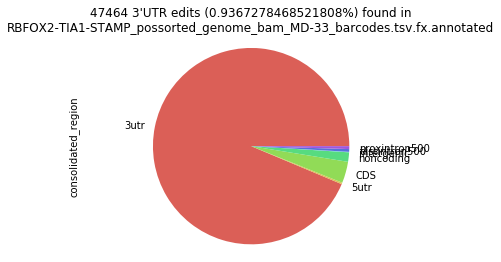

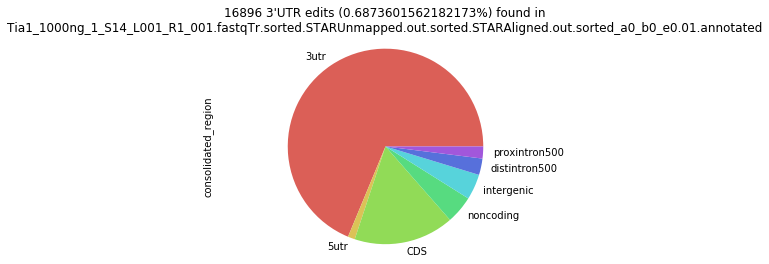

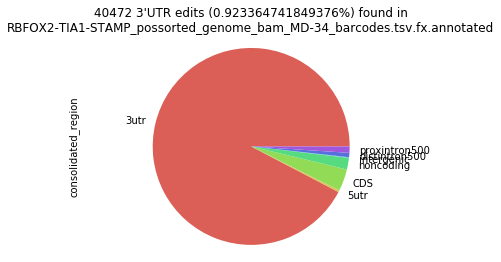

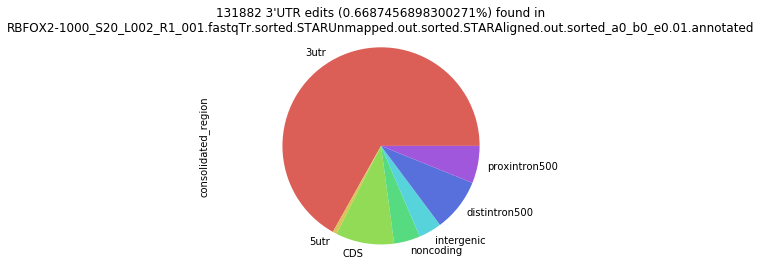

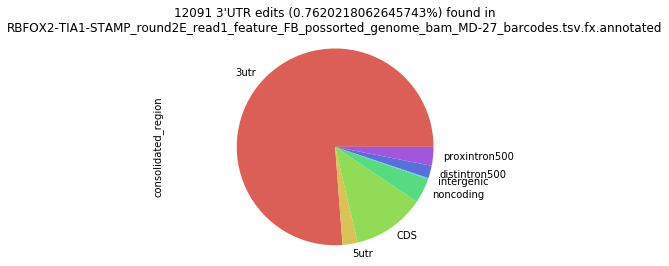

In [9]:
for f in [tia1_aggr_file, tia1_bulk_file, rbfox2_aggr_file, rbfox2_bulk_file, undetermined_aggr_file]:
    plot_pie(f, conf=0.9)

### Looking at the edit distribution between sc aggregates and the bulk data (TIA1, RBFOX2) at conf=0.999
- after calling edits with SAILOR and annotating with annotator.

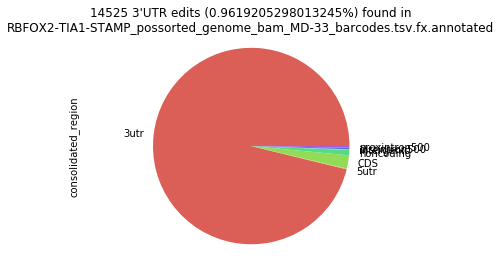

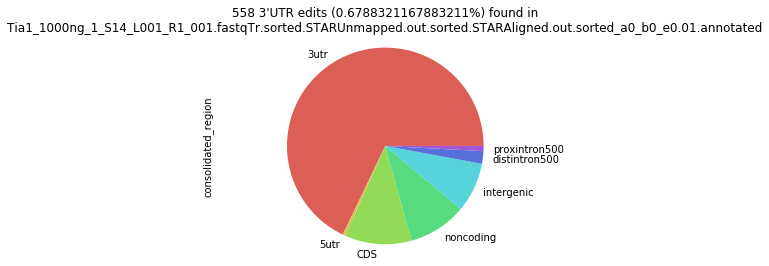

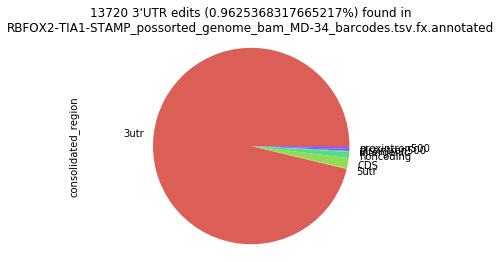

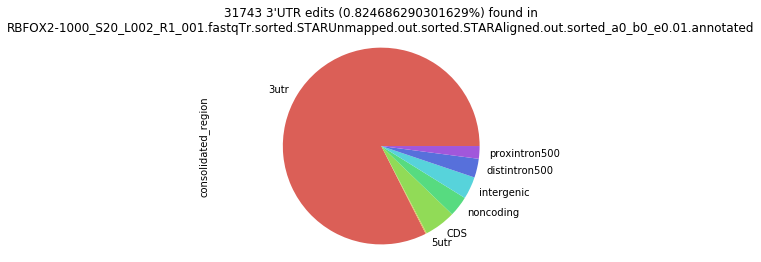

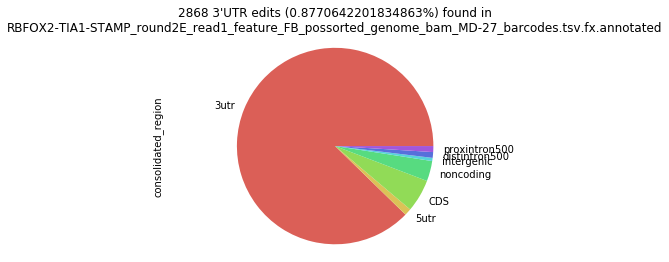

In [10]:
for f in [tia1_aggr_file, tia1_bulk_file, rbfox2_aggr_file, rbfox2_bulk_file, undetermined_aggr_file]:
    plot_pie(f, conf=0.999)

In [11]:
downsampled_file = os.path.join(input_dir, 'RPS2-STAMP_possorted_genome_bam_MD.bamdownsampled.1-0.fx.annotated')

### Look at the RPS2 (filtered 3k) vs RPS2 (all 10k) vs RPS2 (bulk) at low conf>=0.5

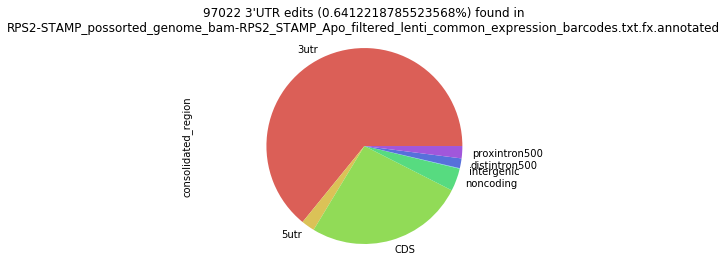

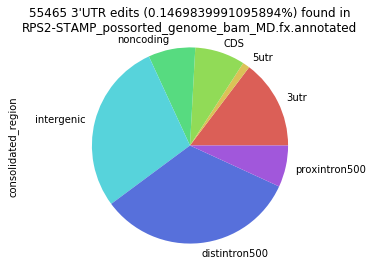

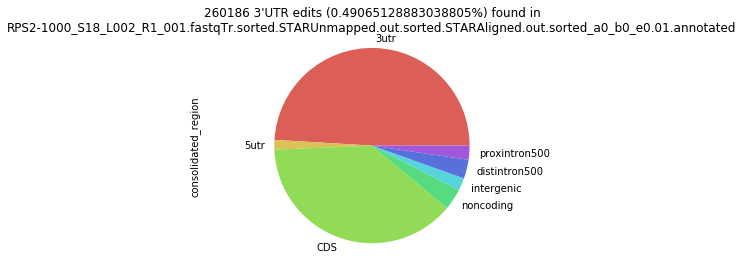

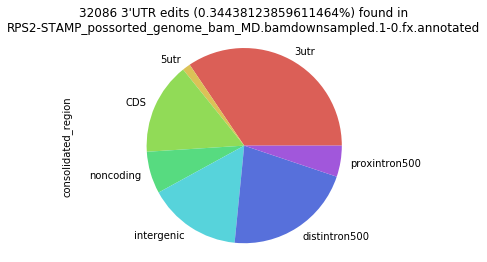

In [12]:
for f in [rps2_aggr_file_3k, rps2_aggr_file_10k, rps2_bulk_file, downsampled_file]:
    plot_pie(f, conf=0.5)

### Look at the RPS2 (filtered 3k) vs RPS2 (all 10k) vs RPS2 (bulk) at conf>=0.9

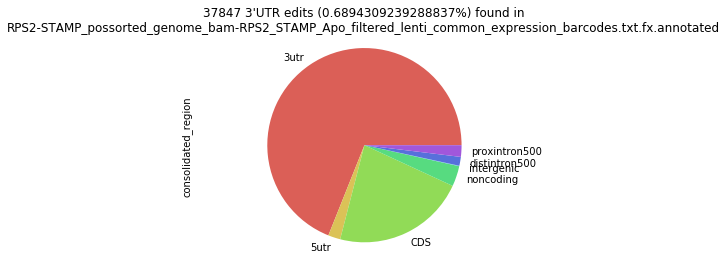

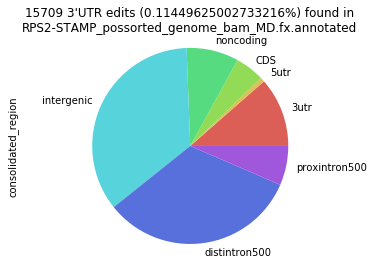

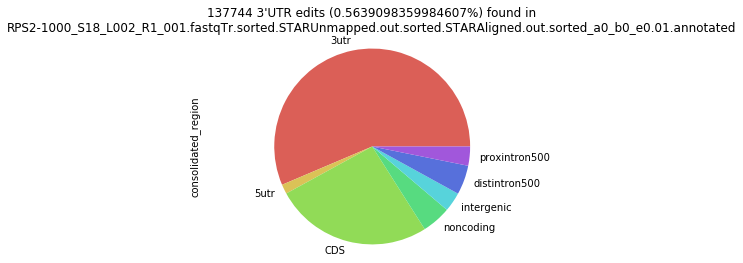

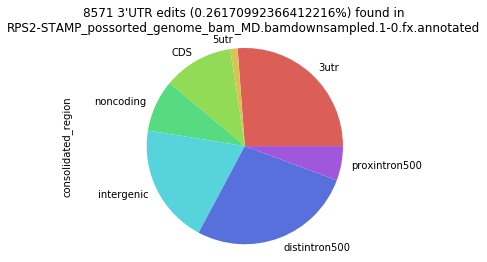

In [13]:
for f in [rps2_aggr_file_3k, rps2_aggr_file_10k, rps2_bulk_file, downsampled_file]:
    plot_pie(f, conf=0.9)

### Look at the RPS2 (filtered 3k) vs RPS2 (all 10k) vs RPS2 (bulk) at high conf (0.999)

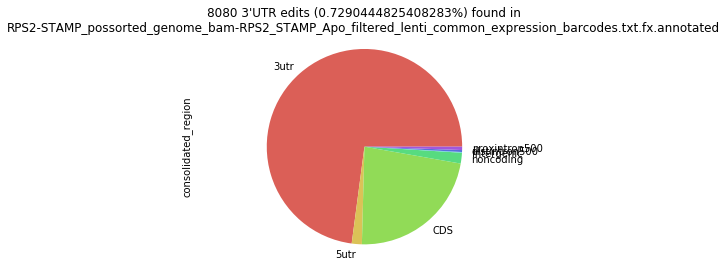

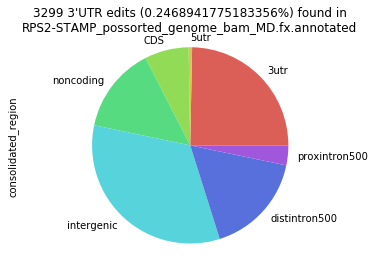

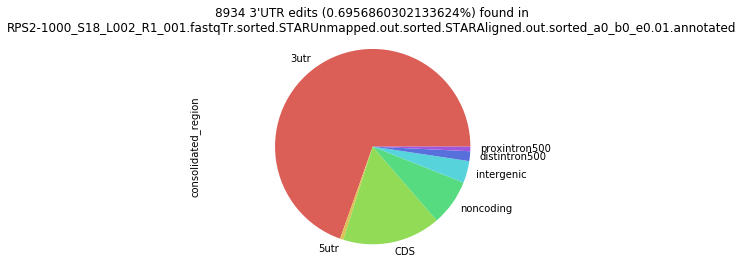

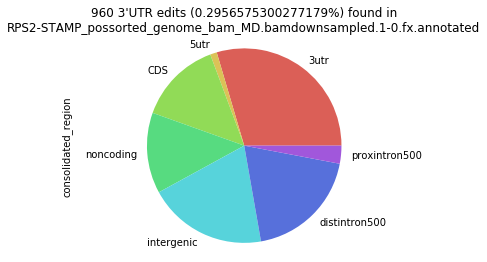

In [16]:
for f in [rps2_aggr_file_3k, rps2_aggr_file_10k, rps2_bulk_file, downsampled_file]:
    plot_pie(f, conf=0.99999)

### Look at the RPS2 (filtered 3k) vs RPS2 (all 10k) vs RPS2 (bulk) at high conf (1)

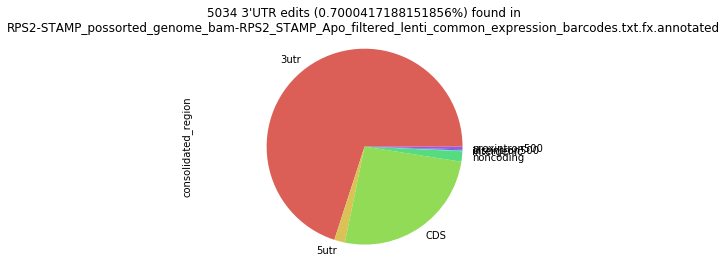

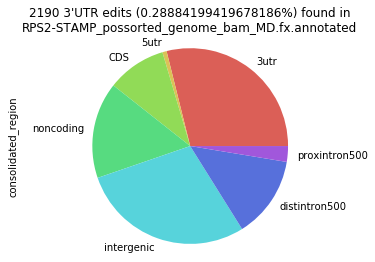

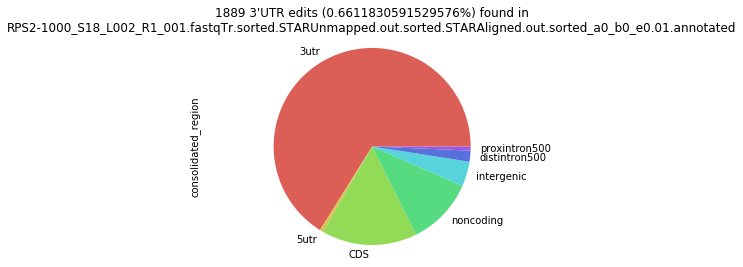

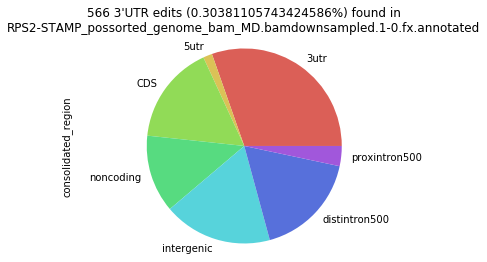

In [14]:
for f in [rps2_aggr_file_3k, rps2_aggr_file_10k, rps2_bulk_file, downsampled_file]:
    plot_pie(f, conf=1)